In [51]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D ,Dropout, Flatten ,MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.models import load_model

In [43]:
datagentrain= ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2)
datagentest= ImageDataGenerator(rescale=1./255)
datagenval= ImageDataGenerator(rescale=1./255)

In [44]:
train=datagentrain.flow_from_directory('/home/user/Downloads/disease/chest_xray/train'
                                       ,batch_size=32,target_size=(150,150),color_mode="grayscale")
test=datagentest.flow_from_directory('/home/user/Downloads/disease/chest_xray/test'
                                     ,batch_size=8,target_size=(150,150),color_mode="grayscale")
val=datagenval.flow_from_directory('/home/user/Downloads/disease/chest_xray/val'
                                     ,batch_size=8,target_size=(150,150),color_mode="grayscale")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [45]:
class_labels=train.class_indices
class_labels={k:v for v,k in class_labels.items()}
classes = list(class_labels.values())
class_labels

{0: 'NORMAL', 1: 'PNEUMONIA'}

NORMAL


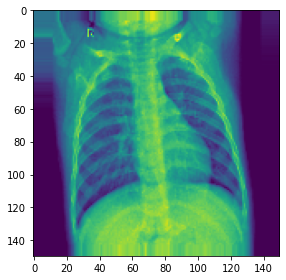

PNEUMONIA


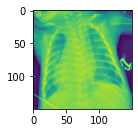

PNEUMONIA


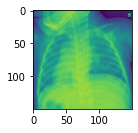

PNEUMONIA


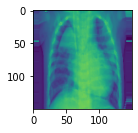

PNEUMONIA


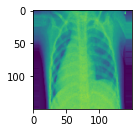

PNEUMONIA


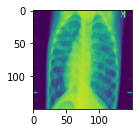

In [46]:
plt.figure(figsize=(15,10))
for(i,j) in [(2,1),(4,2),(8,3),(12,4),(15,5),(18,6)]:
    plt.subplot(2,3,j)
    print(classes[np.argmax(train[0][1][i])])
    plt.imshow(train[0][0][i])
    plt.show()

In [47]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,1),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))#model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20736)            

In [48]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

In [49]:
callbacks=[ModelCheckpoint('pneumonia.h5',verbose=1,save_best_only=True),
          EarlyStopping(patience=10,monitor='val_loss')]


In [50]:
result=model.fit(train,validation_data=test,epochs=50,callbacks=callbacks)

Epoch 1/50
163/163 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.8328 - auc: 0.9067
Epoch 00001: val_loss improved from inf to 0.33990, saving model to pneumonia.h5
163/163 [==============================] - 88s 542ms/step - loss: 0.3882 - accuracy: 0.8328 - auc: 0.9067 - val_loss: 0.3399 - val_accuracy: 0.8478 - val_auc: 0.9347
Epoch 2/50
163/163 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.9114 - auc: 0.9731
Epoch 00002: val_loss did not improve from 0.33990
163/163 [==============================] - 88s 538ms/step - loss: 0.2098 - accuracy: 0.9114 - auc: 0.9731 - val_loss: 0.4274 - val_accuracy: 0.8478 - val_auc: 0.9230
Epoch 3/50
163/163 [==============================] - ETA: 0s - loss: 0.1892 - accuracy: 0.9264 - auc: 0.9779
Epoch 00003: val_loss did not improve from 0.33990
163/163 [==============================] - 88s 538ms/step - loss: 0.1892 - accuracy: 0.9264 - auc: 0.9779 - val_loss: 0.4234 - val_accuracy: 0.8654 - val_a

In [52]:
model=load_model("pneumonia.h5")

In [53]:
model.evaluate(test)

78/78 [==============================] - 6s 77ms/step - loss: 0.2445 - accuracy: 0.9006 - auc: 0.9663


[0.24451783299446106, 0.9006410241127014, 0.9662550091743469]

In [54]:
model.evaluate(val)

2/2 [==============================] - 0s 38ms/step - loss: 0.1417 - accuracy: 1.0000 - auc: 1.0000


[0.14173409342765808, 1.0, 1.0]